In [1]:
import dataloader
import pandas as pd
import utils
import model

import torch
import torch.nn as nn
import torch.optim as optim

from train import train_epoch

In [2]:
config = utils.load_config()

In [3]:
df_dataset = pd.read_csv(config['PATH_DATASET_CSV'])
df_dataset = df_dataset.dropna().reset_index(drop=True)
X_train,X_test,y_train,y_test = dataloader.dataset_split(df_dataset)

In [4]:
traindata=dataloader.MRIDataset(X_train,y_train)
testdata=dataloader.MRIDataset(X_test,y_test)

from torch.utils.data import DataLoader
train_dataloader = DataLoader(traindata, batch_size=2, shuffle=False)
test_dataloader  = DataLoader(testdata, batch_size=1, shuffle=False)

print('train_dataloader : ',len(train_dataloader.dataset))
print('test_dataloader : ',len(test_dataloader.dataset))

train_dataloader :  792
test_dataloader :  198


Feature batch shape: torch.Size([2, 1, 256, 256, 256])
Label: 0


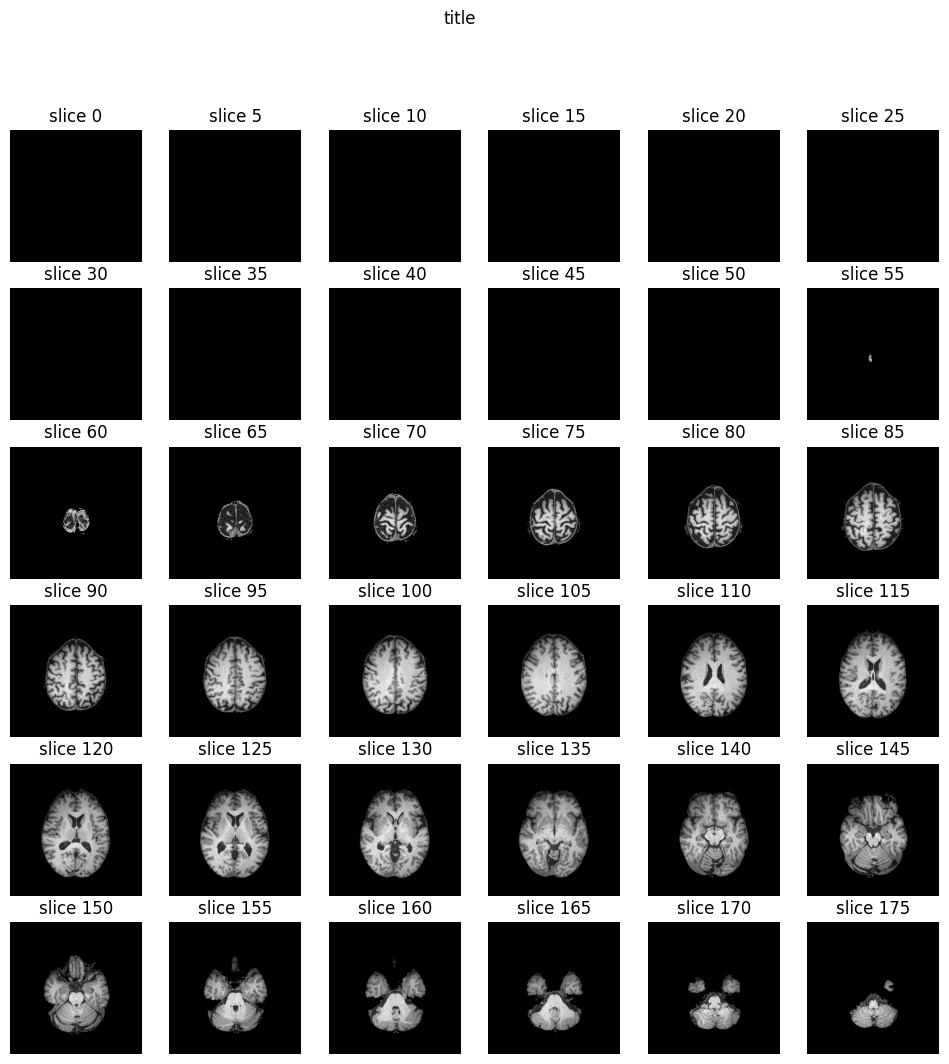

In [5]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
img = train_features[0].squeeze() 
label = train_labels[0]
print(f"Label: {label}")
utils.stack_plot(img)

In [6]:
device = torch.device('cpu')

model, _ = model.generate_model(model_name='RESNET')
model.to(device)

optimizer = optim.Adam(model.parameters(), lr= 0.0001, betas=(0.5, 0.999))
criterion_clf = nn.CrossEntropyLoss().to(device)

/Users/shin/MyDir/MyGit/BrainMR_MCI/models/resnet.py:145: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  m.weight = nn.init.kaiming_normal(m.weight, mode='fan_out')


In [7]:
train_logger = utils.Logger(
    os.path.join('./log/', 'train.log'),['epoch', 'loss','prec1','prec2', 'lr'])
train_batch_logger = utils.Logger(
    os.path.join('./log/', 'train_batch.log'), ['epoch', 'batch', 'iter', 'loss', 'lr'])

In [8]:
'''
train_epoch(device, epoch, data_loader, model, criterion, optimizer, epoch_logger, batch_logger):
'''

train_epoch(device,1,train_dataloader,model,criterion_clf,optimizer,train_logger,train_batch_logger)

train at epoch 1
Epoch: [1][0/396]	 lr: 0.00010	Time 58.375 (58.375)	Data 2.704 (2.704)	Loss 2.0530 (2.0530)	Prec@1 0.00000 (0.00000)	Prec@5 0.00000 (0.00000)


KeyboardInterrupt: 